## Приближенное вычисление производной с помощью конечно-разностной формулы

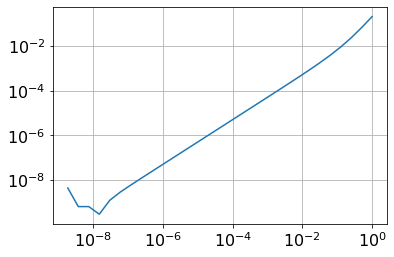

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

f = lambda x : np.sin(x)
df = lambda x : np.cos(x)
x0 = 0.1
n = 30
h = np.zeros(n)
err = np.zeros(n)
for i in range(n):
    h[i] = 2**(-i)
    df_num = (f(x0 + h[i]) - f(x0)) / h[i]
    err[i] = np.abs(df_num - df(x0))
fig, ax = plt.subplots()
ax.loglog(h,err)
ax.grid(True)

### Матрицы дифференцирования


In [8]:
n = 50
h = 1/(n-1)
xx = np.linspace(0, 1, n)
D = -0.5 * np.diag(np.ones(n-1), k = -1) + \
    +0.5 * np.diag(np.ones(n-1), k = +1)
D[0, :2] = np.array([-1, 1])
D[-1, -2:] = np.array([-1, 1])
# print(D)
D = D/h

f = np.sin(xx)
df = np.cos(xx)

df_a = D @ f

print('{0:6.3e}'.format(
    np.linalg.norm(df_a - df, ord = np.inf)))

8.549e-03


# Численное интегрирование

### Формула трапеций

1.2417635808503746e-09


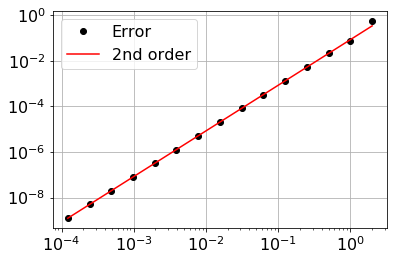

In [3]:
f = lambda x: 1/(1 + x**2)
I_ex = np.pi/2 
N = 15
err = np.zeros(N)
h = 2/2**np.arange(N)
n = 2**np.arange(N)
for k in range(N):
    x = np.linspace(-1, 1, n[k] + 1)
    fval = f(x)
    I_tr = h[k] * (np.sum(fval) - 0.5*(fval[0] + fval[-1]))
    err[k] = np.abs(I_tr - I_ex)
fig, ax = plt.subplots()
plt.loglog(h, err, 'ko', label = 'Error')
plt.loglog(h, err[-1]*(h/h[-1])**2, 'r-', label = '2nd order')
plt.legend()
plt.grid(True)
print(err[-1])

### Квадратурная формула Гаусса

In [4]:
from scipy import integrate

f = lambda x: 1/(1 + x**2)
I_ex = np.pi/2 
n = 20000
h = 2/n
err = np.zeros(N)
x = np.linspace(-1, 1, n+1)
fval = f(x)
I_tr = h * (np.sum(fval) - 0.5*(fval[0] + fval[-1]))
#
Ig, a = integrate.fixed_quad(f, -1, 1, n = 20)
print('Error trap  = {0:6.3e}\nError gauss = {1:6.3e}'.
      format(np.abs(I_tr - I_ex), np.abs(Ig - I_ex)))

Error trap  = 8.333e-10
Error gauss = 1.554e-15
